Column names in the DataFrame: Index(['Coal_Production', 'Coal_Type', 'Energy_Consumption', 'Emission_Factor',
       'Unnamed: 4', 'Carbon_Emission'],
      dtype='object')


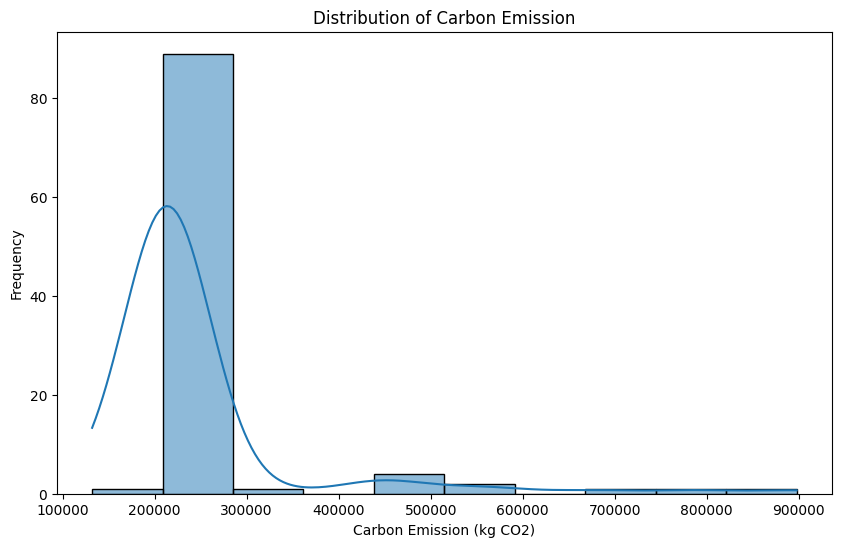

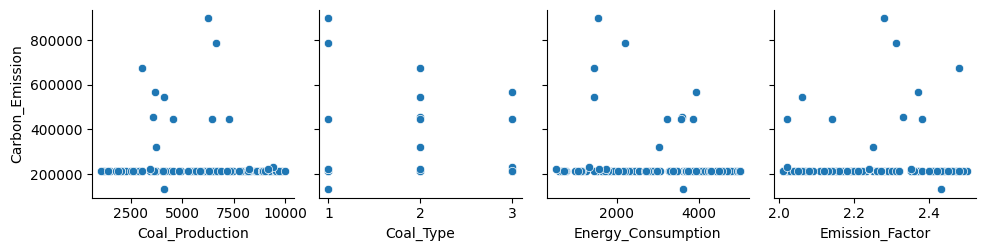

Mean Absolute Error: 60381.22299999998


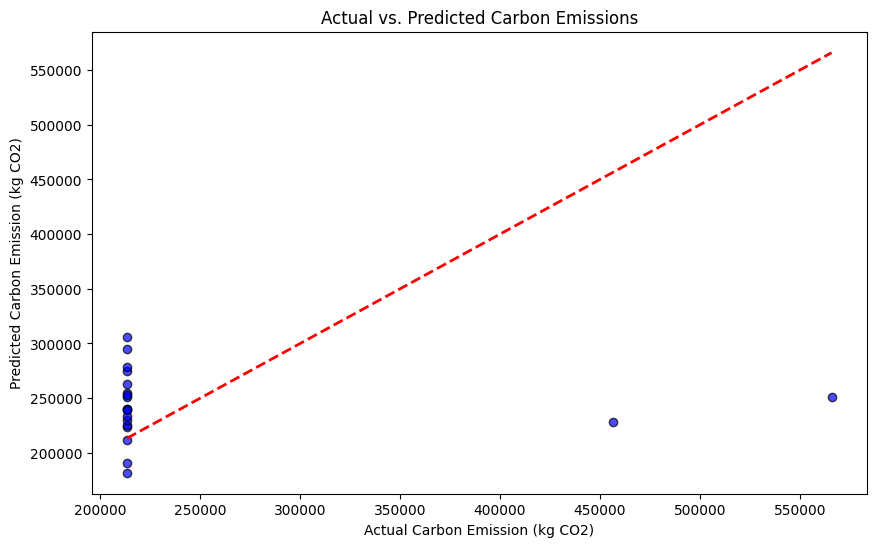

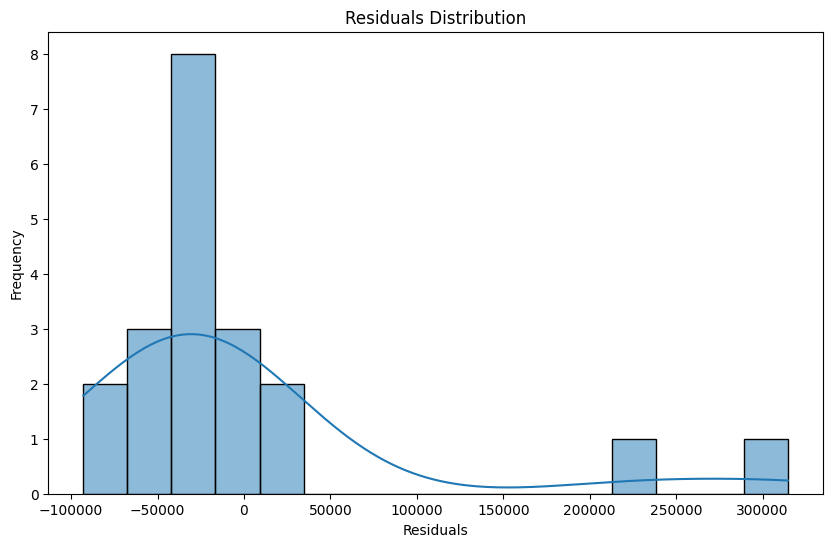

Predicted Carbon Emission: 259605.7 kg CO2


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data from CSV file
df = pd.read_csv('coal_emission_data.csv')

# Print column names to debug the KeyError
print("Column names in the DataFrame:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify if 'Carbon_Emission' column exists
if 'Carbon_Emission' not in df.columns:
    raise KeyError("'Carbon_Emission' column not found in the DataFrame. Check the column names in your CSV file.")

# Visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbon_Emission'], bins=10, kde=True)
plt.title('Distribution of Carbon Emission')
plt.xlabel('Carbon Emission (kg CO2)')
plt.ylabel('Frequency')
plt.show()

sns.pairplot(df, x_vars=['Coal_Production', 'Coal_Type', 'Energy_Consumption', 'Emission_Factor'], y_vars='Carbon_Emission')
plt.show()

# Define features and target
X = df[['Coal_Production', 'Coal_Type', 'Energy_Consumption', 'Emission_Factor']]
y = df['Carbon_Emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Carbon Emissions')
plt.xlabel('Actual Carbon Emission (kg CO2)')
plt.ylabel('Predicted Carbon Emission (kg CO2)')
plt.show()

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Function to predict carbon emission based on user input
def predict_carbon_emission(coal_production, coal_type, energy_consumption, emission_factor):
    input_data = np.array([[coal_production, coal_type, energy_consumption, emission_factor]])
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage
coal_production = 8504  # User input
coal_type = 3  # User input
energy_consumption = 3250  # User input
emission_factor = 2.1  # User input

# Get the predicted carbon emission
predicted_emission = predict_carbon_emission(coal_production, coal_type, energy_consumption, emission_factor)
print(f"Predicted Carbon Emission: {predicted_emission} kg CO2")


In [12]:
# Save the model
joblib.dump(model, 'carbon_emission_model.pkl')

['carbon_emission_model.pkl']